<div style="display: flex; width: 100%;">
    <div style="flex: 1; padding: 0px;">
        <p>© Albert Palacios Jiménez, 2023</p>
    </div>
    <div style="flex: 1; padding: 0px; text-align: right;">
        <img src="./assets/ieti.png" height="32" alt="Logo de IETI" style="max-height: 32px;">
    </div>
</div>
<hr/>

# Instal·lar dependències

Les següents línies de codi instal·len les dependències necessàries per executar el codi d'aquest notebook.

Un cop instal·lades, cal reiniciar el kernel perquè els canvis tinguin efecte.

També es pot executar el codi en un terminal ambda la comanda `pip install X`.

In [ ]:
# Instal·la dependències (o bé, fer: pip install ... des de la linia de comandes)
# Si les dependències ja estan instal·lades, aquesta cel·la es pot ignorar
%pip install mysql-connector-python
%pip install matplotlib
%pip install pandas

## Instal·lar base de dades MySQL

Descarregar la base de dades 'world.sql' <a href="./assets/world.sql">d'aquí</a>.

Crear un servidor MySQL amb Docker:

```bash
docker pull mysql
docker run --name mysqlServer -p 3306:3306 -e MYSQL_ROOT_PASSWORD=pwd -d mysql
docker exec -i mysqlServer mysql -uroot -ppwd < world.sql
```

## Exemples

In [3]:
# Imports (i funció de consultes)
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector

def db_query(qry):
    cnx = mysql.connector.connect(user='root', password='pwd', host='127.0.0.1', database='world')
    cur = cnx.cursor()
    cur.execute("SELECT * FROM city")
    rst = cur.fetchall()
    cnx.close()
    return rst

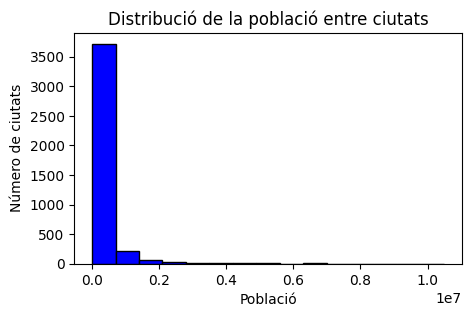

In [4]:
# Convertir dades a un DataFrame Pandas
rst = db_query("SELECT * FROM city")
df = pd.DataFrame(rst, columns=['ID', 'City', 'Country Code', 'District', 'Population'])

# Histograma
plt.figure(figsize=(5, 3))
plt.hist(df['Population'], bins=15, color='blue', edgecolor='black')
plt.title('Distribució de la població entre ciutats')
plt.xlabel('Població')
plt.ylabel('Número de ciutats')
plt.show()


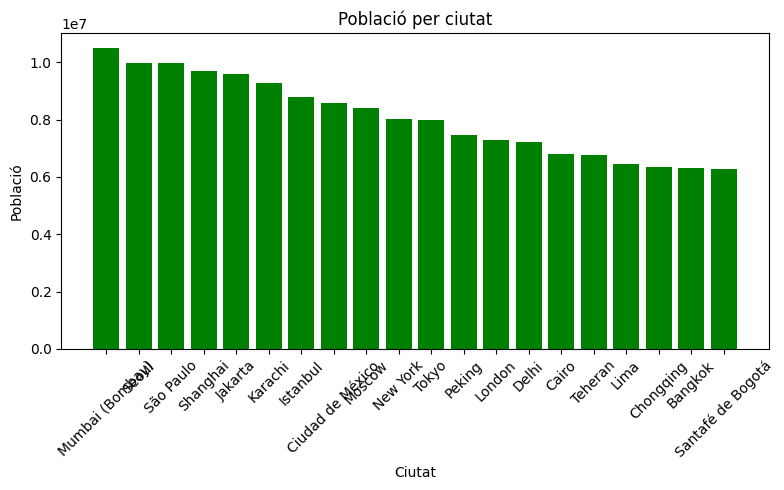

In [5]:
# Convertir dades a un DataFrame de Pandas
rst = db_query("SELECT * FROM city")
df = pd.DataFrame(rst, columns=['ID', 'City', 'Country Code', 'District', 'Population'])

# Filtrar les ciutats més grans
top_cities = df.nlargest(20, 'Population')

# Ciutats vs població
plt.figure(figsize=(8, 5))
plt.bar(top_cities['City'], top_cities['Population'], color='green')
plt.title('Població per ciutat')
plt.xlabel('Ciutat')
plt.ylabel('Població')
plt.xticks(rotation=45)  # Rotar els noms de les ciutats
plt.tight_layout()
plt.show()

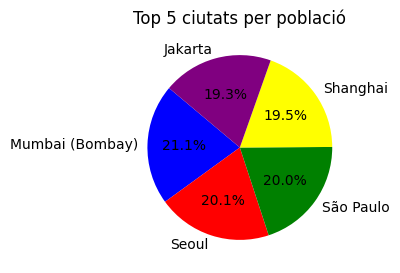

In [6]:
# Convertir dades a un DataFrame de Pandas
rst = db_query("SELECT * FROM city")
df = pd.DataFrame(rst, columns=['ID', 'City', 'Country Code', 'District', 'Population'])

# Filtrar les 5 ciutats més grans
top_cities = df.nlargest(5, 'Population')

# Pie chart
plt.figure(figsize=(5, 3))
plt.pie(top_cities['Population'], labels=top_cities['City'], autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'yellow', 'purple'])
plt.title('Top 5 ciutats per població')
plt.show()